# <font color=green> Environmental Image Dataset Analysis (Lab-02) </font>

The code below aims to achieve the following goals and objectives:

## Goals:
- Preprocess the image dataset to ensure uniformity in size, format, and quality, enabling effective analysis and modeling.
- Implement <b>data augmentation</b> techniques to enhance the diversity of the image dataset and improve model generalization.
- Visualize the distribution of classes within the image dataset to understand class imbalances and inform data sampling strategies.
- Construct deep learning models, such as convolutional neural networks (CNNs), to classify images into relevant categories.
- Fine-tune model architectures and hyperparameters to optimize model performance and achieve accurate classification results.
- Evaluate the performance of deep learning models using a variety of evaluation metrics to assess their effectiveness in environmental classification tasks.

## Objectives:
- Prepare the image dataset for analysis and modeling by addressing preprocessing tasks such as resizing, normalization, and augmentation.
- Develop a convolutional neural network for classification of images.
- Raise awareness about the applications of CNNs.
- Utilize a simple balanced dataset to facilitate understanding of the network flow.
- Develop deep learning models to classify images.
- Evaluate the performance of deep learning models using appropriate metrics such as accuracy, precision, recall, and F1-score.

### Before moving towards the code:
see these tutorials to complete understand about the topic:

1. CNN's [Link](https://www.youtube.com/watch?v=pDdP0TFzsoQ&ab_channel=PatrickLoeber)
2. Activation Functions [Link](https://www.youtube.com/watch?v=Fu273ovPBmQ&ab_channel=AssemblyAI)
3. Max/Average Pooling [Link](https://www.youtube.com/watch?v=pDdP0TFzsoQ&ab_channel=PatrickLoeber)
3. adaptive Average Pooling [Link](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveAvgPool2d.html)
4. Fully Connected Layers [Link](https://www.youtube.com/watch?v=pDdP0TFzsoQ&ab_channel=PatrickLoeber)
5. Categorical Cross-Entropy [Link](https://www.youtube.com/watch?v=HmXJ6JPQyI8&ab_channel=DataMites)
6. Optimizers (e.g; Adam, SGD) [Link](https://www.youtube.com/watch?v=mdKjMPmcWjY&ab_channel=CodeEmporium)
7. Understanding the loss and validation graph [Link](https://www.youtube.com/watch?v=p3CcfIjycBA&ab_channel=DigitalSreeni)
8. Understanding of accuracy metrics [Link](https://www.youtube.com/watch?v=2osIZ-dSPGE&ab_channel=codebasics)
8. Understanding of classification report [Link](https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397)
9. Understanding of Confusion Matrix [Link](https://www.youtube.com/watch?v=gkNccYwtAbU&ab_channel=MaheshHuddar)

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, SubsetRandomSampler, Dataset
import matplotlib.pyplot as plt
import numpy as np

### Why GPU necessary to train a CNN?

- Image is a 2D matrix. To perform multiple operations like multiplying images to generate features are computationally expensive.
- GPU's are effective with the matrix operations that's why we used the CNN's.

In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if str(device) == "cuda":
    print("Using GPU")
else:
    print("Falling back to CPU")

Using GPU


### **Dataset** ([Link](https://www.kaggle.com/datasets/nirmalsankalana/sugarcane-leaf-disease-dataset))
The dataset comprises manually collected images depicting various types of sugarcane leaf diseases. It encompasses five primary categories: Healthy, Mosaic, Redrot, Rust, and Yellow disease. Captured using smartphones with diverse configurations, the dataset comprises a total of 2569 images, ensuring diversity and balance across categories. The dataset offers a comprehensive representation of sugarcane leaf diseases. Notably, the images exhibit varying sizes due to their diverse sources, with all images presented in RGB format.

In [3]:
# Define transforms for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize(224), # Resize the image to 224x224
    transforms.CenterCrop(224), # Crop the image to 224x224 around the center
    transforms.ToTensor(), # Convert the image to a pytorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize the image according to the ImageNet statistics
])

# Load dataset from folder
dataset = datasets.ImageFolder('/kaggle/input/sugarcane-leaf-disease-dataset', transform=transform) # Load the dataset from the folder

# Define the split ratios
train_ratio = 0.8 # 80% of the dataset is used for training
val_ratio = 0.1 # 10% of the dataset is used for validation
test_ratio = 0.1 # 10% of the dataset is used for testing

# Calculate the number of samples for each set
num_samples = len(dataset) # Get the number of samples in the dataset
num_train = int(train_ratio * num_samples) # Calculate the number of samples in the training set
num_val = int(val_ratio * num_samples) # Calculate the number of samples in the validation set
num_test = num_samples - num_train - num_val # Calculate the number of samples in the testing set

# Define the samplers for each set
train_sampler = SubsetRandomSampler(range(num_train)) # Randomly sample the training set
val_sampler = SubsetRandomSampler(range(num_train, num_train + num_val)) # Randomly sample the validation set
test_sampler = SubsetRandomSampler(range(num_train + num_val, num_samples)) # Randomly sample the testing set

In [4]:
# Create data loaders
train_loader = DataLoader(dataset, batch_size=32, shuffle=True) # Create the training data loader
val_loader = DataLoader(dataset, batch_size=32, shuffle=False) # Create the validation data loader
test_loader = DataLoader(dataset, batch_size=32, shuffle=False) # Create the testing data loader

In [8]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, num_classes=5):
        super(CNNModel, self).__init__()
#         224, 224, 3 -- > (3, 224, 224)
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d()
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(i128n_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.conv5 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(512)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU(inplace=True)
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.fc = nn.Linear(512 * 7 * 7, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.bn1(x)
        x = self.maxpool(x)
        
        x = self.conv2(x)
        x = self.relu(x)
        x = self.bn2(x)
        x = self.maxpool(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.bn3(x)
        x = self.maxpool(x)
        
        x = self.conv4(x)
        x = self.relu(x)
        x = self.bn4(x)
        x = self.maxpool(x)
        
        x = self.conv5(x)
        x = self.relu(x)
        x = self.bn5(x)
        x = self.maxpool(x)
        
        x = self.avgpool(x) # 2D shape until here
        x = torch.flatten(x, 1) # (n, 512, 7, 7) --> (n, 512*7*7)
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x

# Create an instance of the CNN model
model = CNNModel(num_classes=5).to(device)
# Print the model architecture
print(model)

# you will be asked what is stride in convolutional layers, what ispooling and everything we covered in this lab so far.

CNNModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (relu): ReLU(inplace=True)
  (avgpool): AdaptiveAvgPool2d(ou

In [9]:
!pip install torchsummary

from torchsummary import summary
summary(model, (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
       BatchNorm2d-3         [-1, 64, 224, 224]             128
         MaxPool2d-4         [-1, 64, 112, 112]               0
            Conv2d-5        [-1, 128, 112, 112]          73,856
              ReLU-6        [-1, 128, 112, 112]               0
       BatchNorm2d-7        [-1, 128, 112, 112]             256
         MaxPool2d-8          [-1, 128, 56, 56]               0
            Conv2d-9          [-1, 256, 56, 56]         295,168
             ReLU-10          [-1, 256, 56, 56]               0
      BatchNorm2d-11          [-1, 256, 56, 56]             512
        MaxPool2d-12          [-1, 256, 28, 28]               0
           Conv2d-13          [-1, 512, 28, 28]       1,180,160
             ReLU-14          [-1, 512,

In [10]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Function for training the model
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)
        train_loss = running_loss / len(train_loader.dataset)
        train_losses.append(train_loss)

        model.eval()
        running_loss = 0.0
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
        val_loss = running_loss / len(val_loader.dataset)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    return train_losses, val_losses

# Train the model
num_epochs = 5
train_losses, val_losses = train(model, train_loader, val_loader, criterion, optimizer, num_epochs)


Epoch [1/5], Train Loss: 1.2322, Val Loss: 1.0972
Epoch [2/5], Train Loss: 1.0838, Val Loss: 1.0274
Epoch [3/5], Train Loss: 1.0341, Val Loss: 1.0050
Epoch [4/5], Train Loss: 0.9969, Val Loss: 0.9590
Epoch [5/5], Train Loss: 0.9710, Val Loss: 0.9459


### Analyze the graph
* Is the model overfit/Underfit or well genarlized?

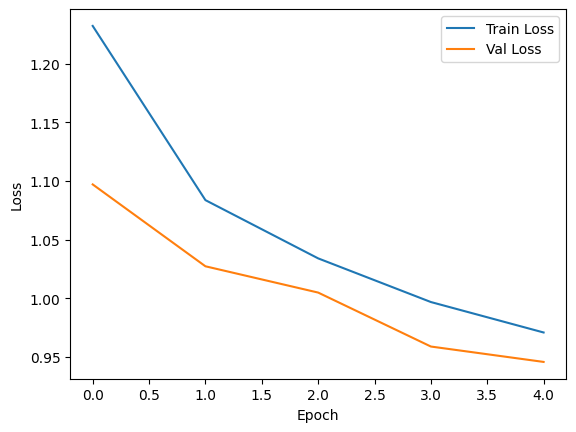

In [11]:
# Plot the training and validation curves
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# what is overfiting and underfitting

In [12]:
# Function for testing the model
def test(model, test_loader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    return y_true, y_pred

# Test the model
y_true, y_pred = test(model, test_loader)

In [13]:
# Generate classification report
target_names = ['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Healthy       0.96      0.98      0.97       522
      Mosaic       0.97      0.94      0.95       462
      RedRot       0.99      0.96      0.97       518
        Rust       0.97      0.98      0.98       514
      Yellow       0.96      0.99      0.97       505

    accuracy                           0.97      2521
   macro avg       0.97      0.97      0.97      2521
weighted avg       0.97      0.97      0.97      2521



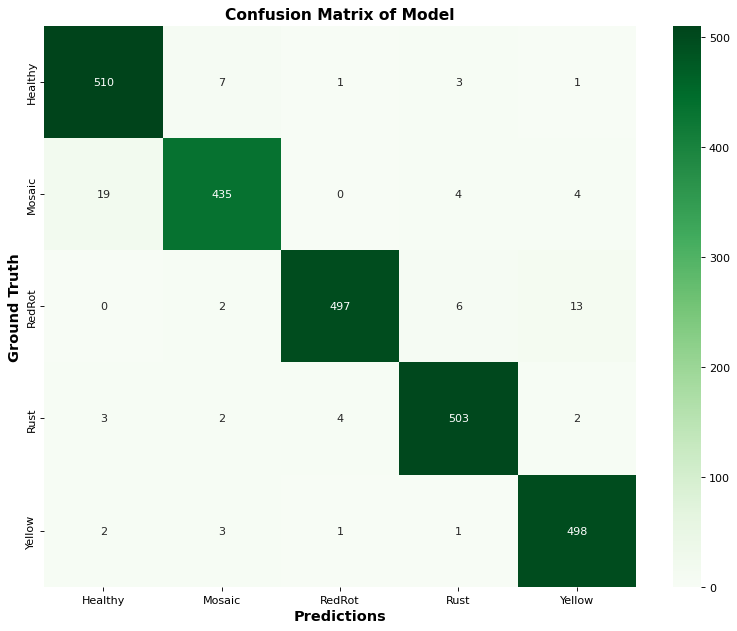

In [14]:
# Generate confusion matrix
import seaborn as sns

conf_arr = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= target_names, yticklabels=target_names)

plt.title('Confusion Matrix of Model', fontweight='bold', fontsize=14.0)
plt.xlabel('Predictions', fontweight='bold', fontsize=13)
plt.ylabel('Ground Truth', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.show(ax)